In [100]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits

In [138]:
# Készíts egy függvényt ami betölti a digits datasetet 
# NOTE: használd az sklearn load_digits-et
# Függvény neve: load_digits()
# Függvény visszatérési értéke: a load_digits visszatérési értéke
def load_dataset():
    return load_digits()

In [139]:
# Vizsgáld meg a betöltött adatszetet (milyen elemek vannak benne stb.)
digits = load_dataset()

In [140]:
# Vizsgáld meg a data paraméterét a digits dataset-nek (tartalom,shape...)
digits.data, digits.data.shape

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 (1797, 64))

In [141]:
# Készíts egy függvényt ami létrehoz egy KMeans model-t 10 db cluster-el
# NOTE: használd az sklearn Kmeans model-jét (random_state legyen 0)
# Miután megvan a model predict-elj vele 
# NOTE: használd a fit_predict-et
# Függvény neve: predict(n_clusters:int,random_state:int,digits)
# Függvény visszatérési értéke: (model:sklearn.cluster.KMeans,clusters:np.ndarray)

def predict(n_clusters:int,random_state:int,digits):
    n_clusters = 10
    random_state = 0
    model = KMeans(random_state=random_state,
                    n_clusters=n_clusters)
    X = digits.data
    clusters = model.fit_predict(X)
    return model,clusters

In [142]:
# Vizsgáld meg a shape-jét a kapott model cluster_centers_ paraméterének.
model, clusters = predict(10,0,digits)
model.cluster_centers_.shape
model.cluster_centers_

/Users/banoczymartin/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[ 0.00000000e+00,  1.11022302e-16,  3.07228916e-01,
         7.16265060e+00,  1.19457831e+01,  1.93373494e+00,
         1.50602410e-01,  5.42168675e-02,  1.73472348e-18,
         1.20481928e-02,  3.28313253e+00,  1.37951807e+01,
         8.46385542e+00,  1.53012048e+00,  9.75903614e-01,
         2.77108434e-01,  8.67361738e-19,  6.44578313e-01,
         1.07108434e+01,  1.15602410e+01,  4.33734940e+00,
         5.25903614e+00,  3.87349398e+00,  3.25301205e-01,
         6.02409639e-03,  4.75903614e+00,  1.47590361e+01,
         5.86144578e+00,  6.87951807e+00,  1.07530120e+01,
         6.21686747e+00,  1.80722892e-02,  0.00000000e+00,
         8.92771084e+00,  1.48072289e+01,  9.35542169e+00,
         1.28132530e+01,  1.43915663e+01,  5.48192771e+00,
         0.00000000e+00,  9.63855422e-02,  6.50602410e+00,
         1.16867470e+01,  1.23433735e+01,  1.48373494e+01,
         1.07590361e+01,  1.56626506e+00,  3.46944695e-18,
         6.02409639e-02,  1.11445783e+00,  3.00000000e+0

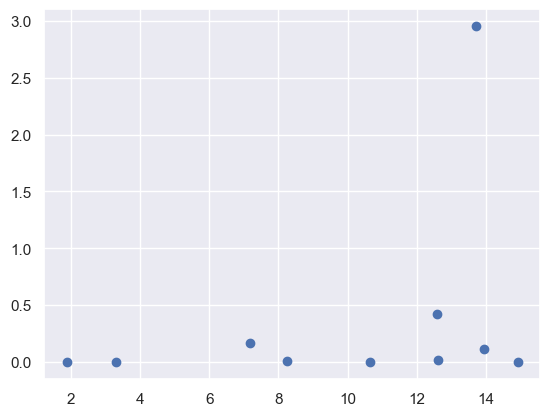

In [143]:
# Készíts egy plotot ami a cluster középpontokat megjeleníti
plt.scatter(model.cluster_centers_[:, 10],model.cluster_centers_[:, 63])
plt.show()

In [145]:
# Készíts egy függvényt ami visszaadja a predictált cluster osztályokat
# NOTE: amit a predict-ből visszakaptunk "clusters" azok lesznek a predictált cluster osztályok
# HELP: amit a model predictált cluster osztályok még nem a labelek, hanem csak random cluster osztályok, 
#       Hogy label legyen belőlük:
#       1. készíts egy result array-t ami ugyan annyi elemű mint a predictált cluster array
#       2. menj végig mindegyik cluster osztályon (0,1....9)
#       3. készíts egy maszkot ami az adott cluster osztályba tartozó elemeket adja vissza
#       4. a digits.target-jét indexeld meg ezzel a maszkkal
#       5. számold ki ennel a subarray-nek a móduszát
#       6. a result array-ben tedd egyenlővé a módusszal azokat az indexeket ahol a maszk True 
#       Erre azért van szükség mert semmi nem biztosítja nekünk azt, hogy a "0" cluster a "0" label lesz, lehet, hogy az "5" label lenne az.

# Függvény neve: get_labels(clusters:np.ndarray, digits)
# Függvény visszatérési értéke: labels:np.ndarray

def get_labels(clusters:np.ndarray, digits):
    result_array = np.empty(clusters.shape)
    for c in digits.target_names:
        mask = c == clusters
        sub_target = digits.target[mask]
        modus = mode(sub_target).mode.item()
        result_array[mask] = modus
    return result_array

In [146]:
# Készíts egy függvényt ami kiszámolja a model accuracy-jét
# Függvény neve: calc_accuracy(target_labels:np.ndarray,predicted_labels:np.ndarray)
# Függvény visszatérési értéke: accuracy:float
# NOTE: Kerekítsd 2 tizedes jegyre az accuracy-t
def calc_accuracy(target_labels:np.ndarray,predicted_labels:np.ndarray):
        accuracy = accuracy_score(digits.target, get_labels(clusters,digits))
        return accuracy


In [147]:
calc_accuracy(clusters,clusters)

/var/folders/ms/lx6k291d71z8f387pwx9g8cm0000gn/T/ipykernel_1751/2310280466.py:21: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  modus = mode(sub_target).mode.item()


0.7935447968836951

In [149]:
# Készíts egy confusion mátrixot és plot-old seaborn segítségével
confusion_matrix(digits.target,get_labels(clusters,digits))

/var/folders/ms/lx6k291d71z8f387pwx9g8cm0000gn/T/ipykernel_1751/2310280466.py:21: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  modus = mode(sub_target).mode.item()


array([[177,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0,  55,  24,   1,   0,   1,   2,   0,  99,   0],
       [  1,   2, 148,  13,   0,   0,   0,   3,   8,   2],
       [  0,   0,   0, 154,   0,   2,   0,   7,   7,  13],
       [  0,   7,   0,   0, 163,   0,   0,   7,   4,   0],
       [  0,   0,   0,   0,   2, 136,   1,   0,   0,  43],
       [  1,   1,   0,   0,   0,   0, 177,   0,   2,   0],
       [  0,   0,   0,   0,   0,   0,   0, 177,   2,   0],
       [  0,   5,   3,   2,   0,   4,   2,   5, 100,  53],
       [  0,  20,   0,   6,   0,   6,   0,   7,   2, 139]])

In [1]:
from HAZI09 import KMeansOnDigits

mykmeans =  KMeansOnDigits(10,0)
mykmeans.load_dataset()
mykmeans.predict()
mykmeans.get_labels()

/Users/banoczymartin/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/banoczymartin/Library/Mobile Documents/com~apple~CloudDocs/OE/4/bevadat/lab/BEVADAT2022232/HAZI/HAZI09/HAZI09.py:30: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  modus = mode(sub_target).mode.item()


In [2]:
mykmeans.calc_accuracy()
mykmeans.accuracy

0.7935447968836951

In [3]:
mykmeans.confusion_matrix()
mykmeans.mat

array([[177,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0,  55,  24,   1,   0,   1,   2,   0,  99,   0],
       [  1,   2, 148,  13,   0,   0,   0,   3,   8,   2],
       [  0,   0,   0, 154,   0,   2,   0,   7,   7,  13],
       [  0,   7,   0,   0, 163,   0,   0,   7,   4,   0],
       [  0,   0,   0,   0,   2, 136,   1,   0,   0,  43],
       [  1,   1,   0,   0,   0,   0, 177,   0,   2,   0],
       [  0,   0,   0,   0,   0,   0,   0, 177,   2,   0],
       [  0,   5,   3,   2,   0,   4,   2,   5, 100,  53],
       [  0,  20,   0,   6,   0,   6,   0,   7,   2, 139]])